In [1]:
import os
import sys

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import matplotlib.colors as colors
import math
import warnings

print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve

['/home/rfpred/notebooks/clean', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
NSP = NatSpatPred()
NSP.initialise(verbose=True)
# importlib.reload(funcs.brain_mapping)
from funcs.brain_mapping import reg_to_nifti, vol_to_surf

rd = RegData
rl = Reloader


warnings.filterwarnings("ignore", category=FutureWarning)

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


### New all encompassing plot showing the main delta r effect for all subs

/tmp/ipykernel_2266232/3102535383.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14, fontweight='bold')


[Text(0, 0.0, '0.0'), Text(0, 0.01, '0.01'), Text(0, 0.02, '0.02')]

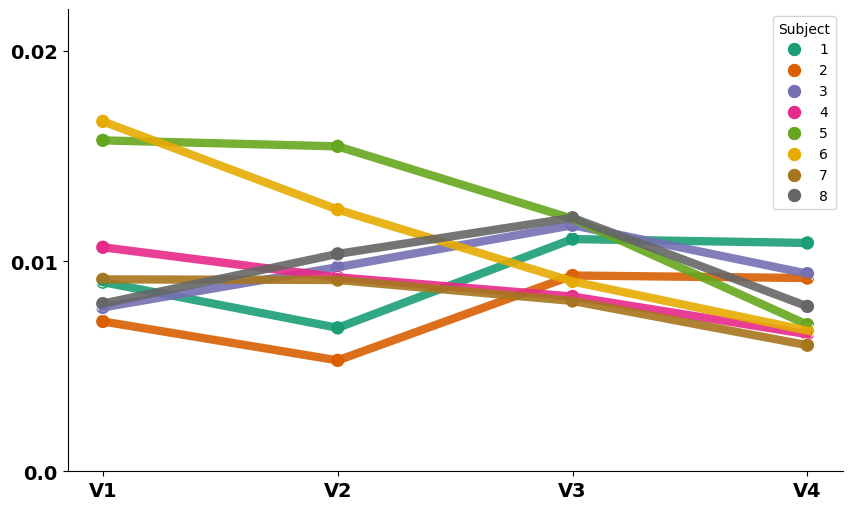

In [20]:

from pyparsing import line
from funcs.analyses import _get_fovea_df
import seaborn as sns


cmap = "Dark2"
# cmap = "inferno"
df_list = []
fig, ax = plt.subplots(1, 1, figsize=(10,6), sharex=True, sharey=True)

for subject in NSP.subjects:
    results = _get_fovea_df(subject, statistic="delta_r", aggregate_layers=True)

    results_df = pd.DataFrame(results, columns=["mean_delta_r"])
    results_df["subject"] = subject[-1]   
    df_list.append(results_df)
    
df_stack = pd.concat(df_list)
df_stack

sns.scatterplot(data=df_stack, x="roi", y="mean_delta_r", hue="subject", alpha=1, legend=True, s=110, palette=cmap)
sns.lineplot(data=df_stack, x="roi", y="mean_delta_r", hue="subject", alpha=.9, legend=False, palette=cmap, linewidth=6)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(0,.022)
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend(title="Subject", loc='upper right', fontsize=10, title_fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14, fontweight='bold')
ax.set_yticks(np.round(np.arange(0, .03, .01), 2))
ax.set_yticklabels(labels=np.round(np.arange(0, .03, .01), 2), fontsize=14, fontweight='bold')



/tmp/ipykernel_4016094/498464895.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14, fontweight='bold')


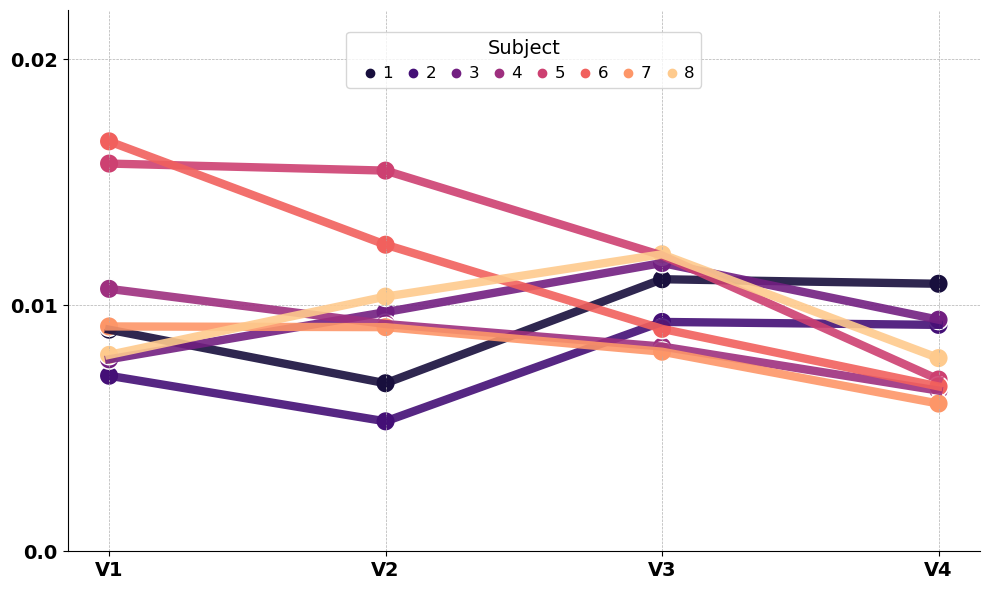

In [61]:
from pyparsing import line
from funcs.analyses import _get_fovea_df
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a new color map
cmap = "magma"

df_list = []
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True, sharey=True)

for subject in NSP.subjects:
    results = _get_fovea_df(subject, statistic="delta_r", aggregate_layers=True)

    results_df = pd.DataFrame(results, columns=["mean_delta_r"])
    results_df["subject"] = subject[-1]
    df_list.append(results_df)

df_stack = pd.concat(df_list)

# Increase the size of the scatter plot points
sns.scatterplot(data=df_stack, x="roi", y="mean_delta_r", hue="subject", alpha=1, legend=True, s=200, palette=cmap, ax=ax)
sns.lineplot(data=df_stack, x="roi", y="mean_delta_r", hue="subject", alpha=.9, legend=False, palette=cmap, linewidth=6, ax=ax)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid to the background
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set y-axis limits
ax.set_ylim(0, .022)

# Set labels
ax.set_ylabel("")
ax.set_xlabel("")

# Customize legend
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], title="Subject", loc='upper center', bbox_to_anchor=(0.5, 1), ncol=8,  fontsize=12, title_fontsize=14)
ax.legend(handles=handles[0:], labels=labels[0:], title="Subject", loc='upper center', bbox_to_anchor=(0.5, .975), ncol=8, fontsize=12, title_fontsize=14, handletextpad=-.25, columnspacing=0.2)


# Customize x and y ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14, fontweight='bold')
ax.set_yticks(np.round(np.arange(0, .03, .01), 2))
ax.set_yticklabels(labels=np.round(np.arange(0, .03, .01), 2), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [77]:
from funcs.analyses import _get_fovea_df, _get_peri_df, _roi_based_plot

##### CHECK WHETHER I CHANGED SOMETHING OR THAT IT IS THE SAME AS THE ORIGINAL FUNCTION

def _roi_based_plot(
    peri_fov_df,
    ax,
    aggregate_layers,
    ylabel=None,
    show_legend=False,
    cmap: str = "cividis",
    alpha: float = 0.8,
    global_min: float = 0,
    global_max: float = 0.5,
    manual_yrange: tuple | None = None,
):
    # Melt the dataframe to long format
    if aggregate_layers:
        long_df = peri_fov_df.melt(
            id_vars=["roi", "subject"],
            value_vars=["Fovea", "Parafovea"],
            var_name="a",
            value_name="Δr values",
        )
    else:
        long_df = peri_fov_df.melt(
            id_vars=["roi", "subject", "Location"],
            value_vars=[
                col
                for col in peri_fov_df.columns
                if col not in ["roi", "subject", "Location"]
            ],
            var_name="Layer",
            value_name="Δr values",
        )

    # Create the line plot for individual subjects
    sns.lineplot(
        x="a",
        y="Δr values",
        hue="subject",
        data=long_df,
        palette=cmap,
        legend=show_legend,
        ax=ax,
        linewidth=5,
        alpha=alpha,
    )

    # Add the scatter plot
    sns.scatterplot(
        x="a",
        y="Δr values",
        hue="subject",
        data=long_df,
        palette=cmap,
        ax=ax,
        s=150,
        legend=False,
    )

    # Calculate the mean values for each 'a' and 'roi'
    mean_df = long_df.groupby(["a", "roi"])["Δr values"].mean().reset_index()

    # Plot the mean line
    sns.lineplot(
        x="a",
        y="Δr values",
        data=mean_df,
        legend=False,
        ax=ax,
        linewidth=6,
        linestyle=":",
        color="black",
        alpha=1,
    )

    # Adjust the x-axis title
    ax.set_xlabel("Visual field location", fontsize=14)

    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=14, fontweight="normal")

    # Add margins to the plot to create white space around the scatter plot
    ax.set_xlim(ax.get_xlim()[0] - 0.05, ax.get_xlim()[1] + 0.05)

    # Set the y-axis limits based on global min and max values
    # ax.set_ylim(global_min - .01, global_max + .01)
    ax.set_ylim(global_min - 0.001, global_max + 0.001)

    if manual_yrange is not None:
        yrange = np.round(
            np.arange(manual_yrange[0], manual_yrange[1], manual_yrange[2]), 3
        )
        ax.set_yticks(yrange)
        ax.set_yticklabels(
            labels=yrange, fontweight="bold", fontsize=14
        )  # Change y-tick labels
    ax.set_xticks([0, 1])  # Set x-ticks
    ax.set_xticklabels(
        ["Fovea", "Parafovea"], fontweight="bold", fontsize=14
    )  # Change x-tick labels

    if show_legend is True:
        ax.legend(
            title="Subject",
            loc="lower right",
            bbox_to_anchor=(1, 0),
            fontsize=10,  # Smaller font size for the legend text
            title_fontsize=10,  # Adjust title font size if needed
            borderpad=0.4,  # Space between the legend border and content
            labelspacing=0.3,  # Space between legend labels,
            markerscale=0.5,
        )

        # ax.legend(
        #     handles=handles[0:],
        #     labels=labels[0:],
        #     title="Subject",
        #     loc="upper center",
        #     bbox_to_anchor=(0.5, 0.975),
        #     ncol=8,
        #     fontsize=12,
        #     title_fontsize=14,
        #     handletextpad=-0.25,
        #     columnspacing=0.2,
        # )


def fovparafov_roiplot(
    subjects,
    statistic="delta_r",
    angles=[90, 210, 330],
    aggregate_layers=True,
    ylabel=None,
    custom_title=None,
    cmap="cividis",
    alpha: float = 0.8,
    figsize=(10, 10),
    figdims=(2, 2),
    manual_yrange: tuple | None = None,
    show_legend:bool = True, 
):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability

    Args:
        subjects (list): The list of subjects
    """
    # Ensure subjects is a list
    if isinstance(subjects, str):
        subjects = [subjects]

    # Define the ROIs
    rois = ["V1", "V2", "V3", "V4"]  # Replace with actual ROI names

    # Create subplots for each ROI in a 2x2 layout
    fig, axs = plt.subplots(
        figdims[0], figdims[1], figsize=figsize, sharex=True, sharey=True
    )
    axs = axs.ravel()  # Flatten the 2x2 grid for easier iteration

    # Set a title for the entire figure
    if custom_title is None:
        fig.suptitle(
            f"Unpredictability sensitivity effects for foveal vs. para-foveal\nnatural image patches (para-foveal patches at angles: {angles})",
            fontsize=16,
            fontweight="normal",
        )
    else:
        fig.suptitle(custom_title, fontsize=16, fontweight="normal")

    global_max = 0  # This is to ensure the y axes are the same for all plots for interpretability
    global_min = 0
    for subject in subjects:
        fov_data = _get_fovea_df(subject, statistic, aggregate_layers)
        peri_data = _get_peri_df(subject, statistic, angles, aggregate_layers)
        global_max = fov_data.max() if fov_data.max() > global_max else global_max
        global_max = peri_data.max() if peri_data.max() > global_max else global_max
        global_min = fov_data.min() if fov_data.min() < global_min else global_min
        global_min = peri_data.min() if peri_data.min() < global_min else global_min

    for i, (ax, roi) in enumerate(zip(axs, rois)):
        combined_df = pd.DataFrame()
        for subject in subjects:
            # Replace with actual functions to get the data
            fov_data = _get_fovea_df(subject, statistic, aggregate_layers)
            peri_data = _get_peri_df(subject, statistic, angles, aggregate_layers)

            if aggregate_layers:
                peri_fov_df = pd.concat([fov_data, peri_data], axis=1)
                peri_fov_df.columns = ["Fovea", "Parafovea"]
            else:
                fov_data["Location"] = "Fovea"
                peri_data["Location"] = "Parafovea"
                peri_fov_df = pd.concat([fov_data, peri_data], axis=0)

            # Filter the data for the current ROI
            peri_fov_df = peri_fov_df.reset_index()
            peri_fov_df = peri_fov_df[peri_fov_df["roi"] == roi]

            peri_fov_df = peri_fov_df.reset_index(drop=True)
            peri_fov_df["subject"] = subject[-1]
            combined_df = pd.concat([combined_df, peri_fov_df])

        # Plot for each ROI
        show_legend = True if i == 0 else False  # Show legend only in the first subplot
        _roi_based_plot(
            combined_df,
            ax,
            aggregate_layers,
            ylabel,
            show_legend=show_legend,
            cmap=cmap,
            alpha=alpha,
            global_min=global_min,
            global_max=global_max,
            manual_yrange=manual_yrange,
        )
        ax.set_title(roi, fontsize=14, fontweight="normal")

        # Remove top and right spines
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

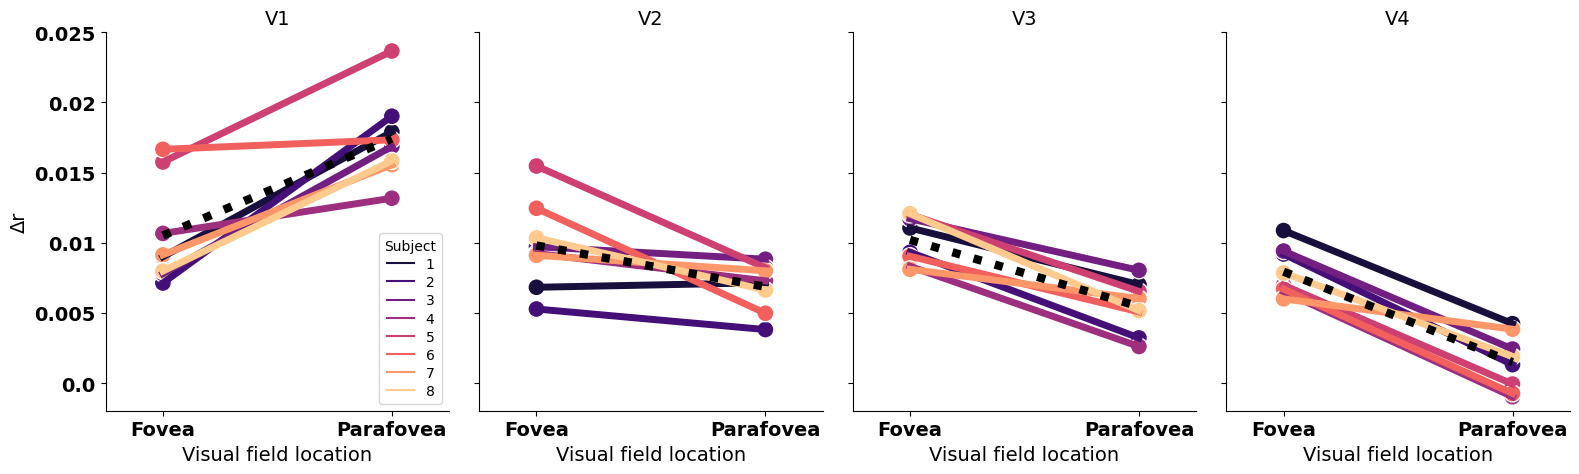

In [78]:
# from funcs.analyses import fovparafov_roiplot

cmap = "magma"
alpha_glob = 1

fovparafov_roiplot(
    subjects=NSP.subjects,
    statistic="delta_r",
    angles=[90, 210, 330],
    # custom_title="Explained additional variance (Δr) of unpredictability effects in fovea and parafovea",
    custom_title="",
    ylabel="Δr",
    cmap=cmap,
    alpha=alpha_glob,
    figsize=(16, 5),
    figdims=(1, 4), 
    manual_yrange=(0, 0.03, .005),
    show_legend=False,
    # manual_yrange=None
)

### Gabor baseline central patch unpredictability results

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


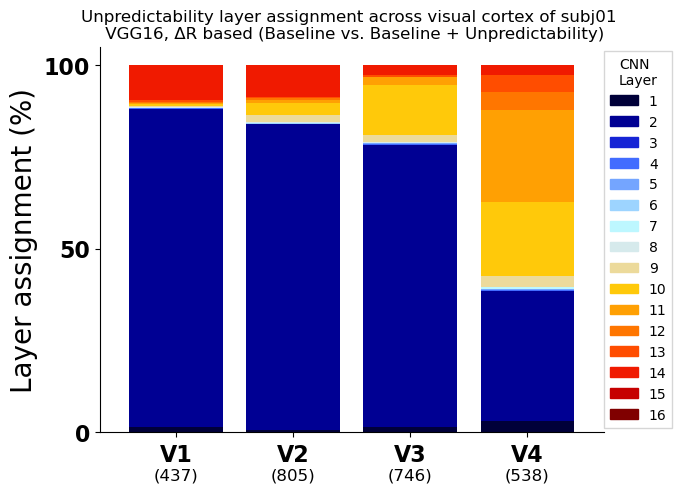

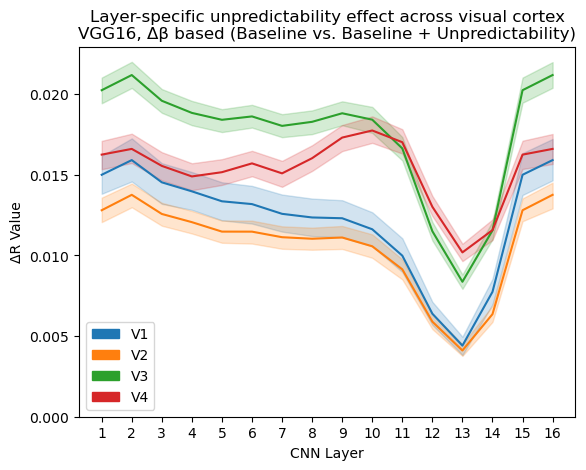

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


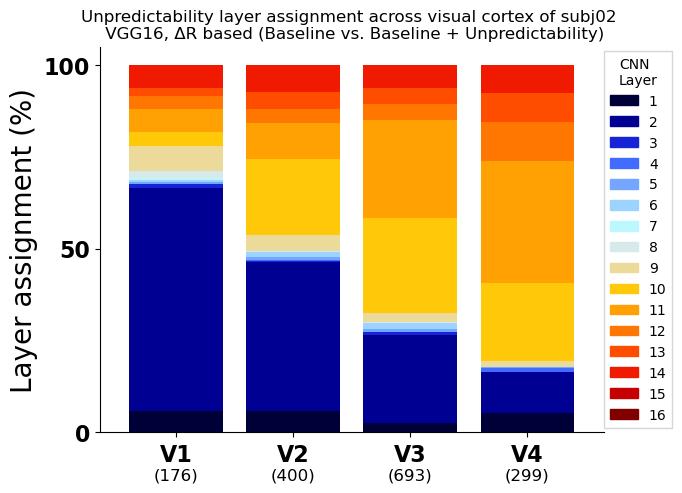

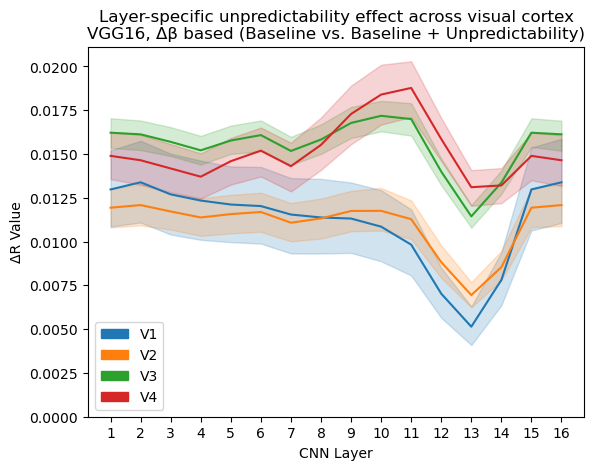

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


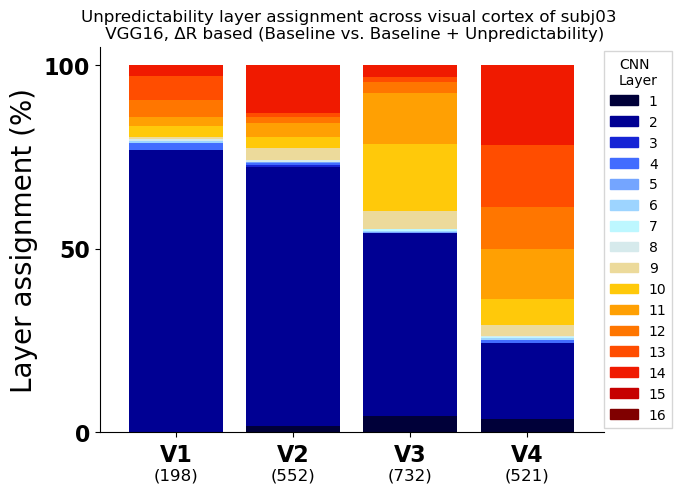

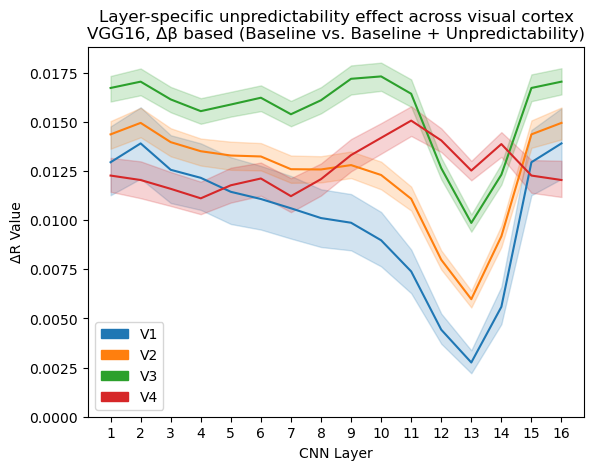

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


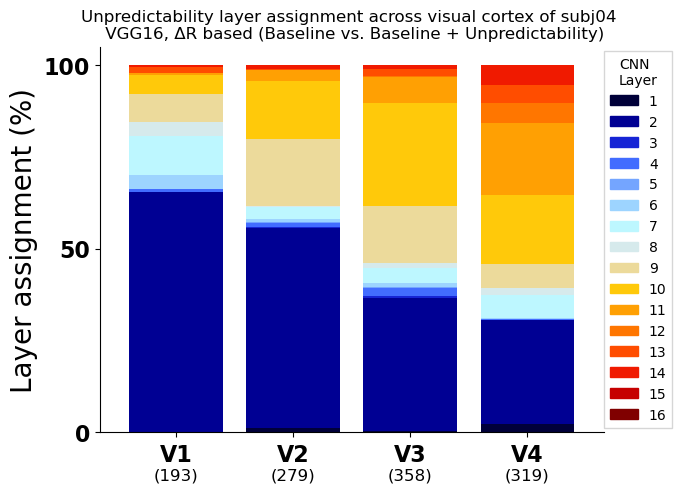

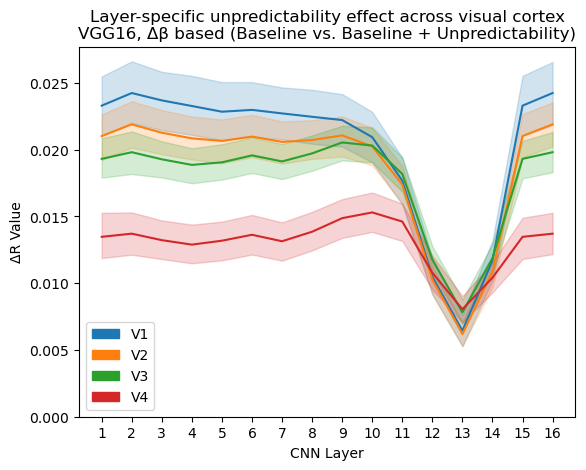

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


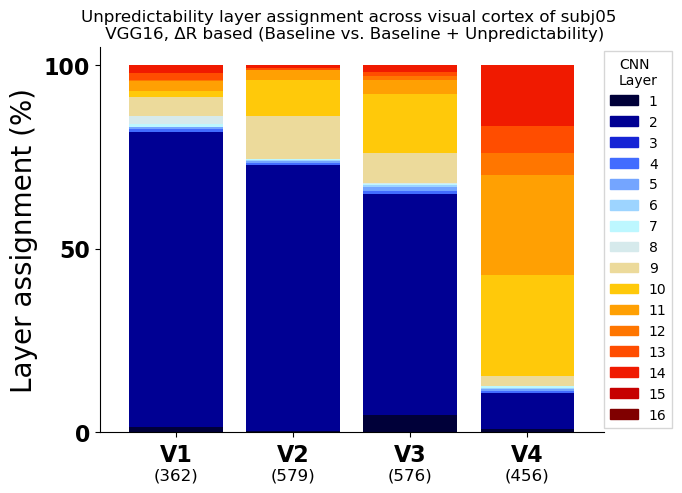

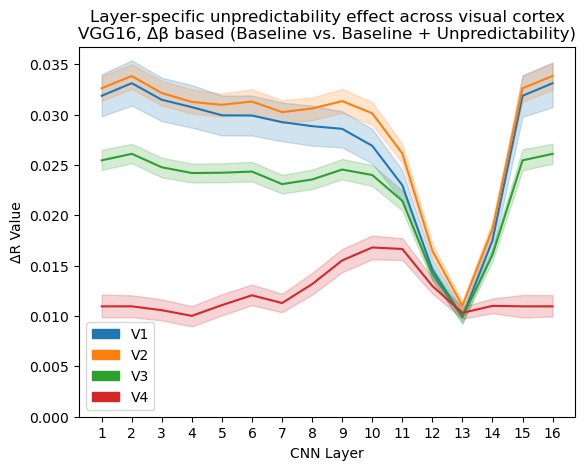

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


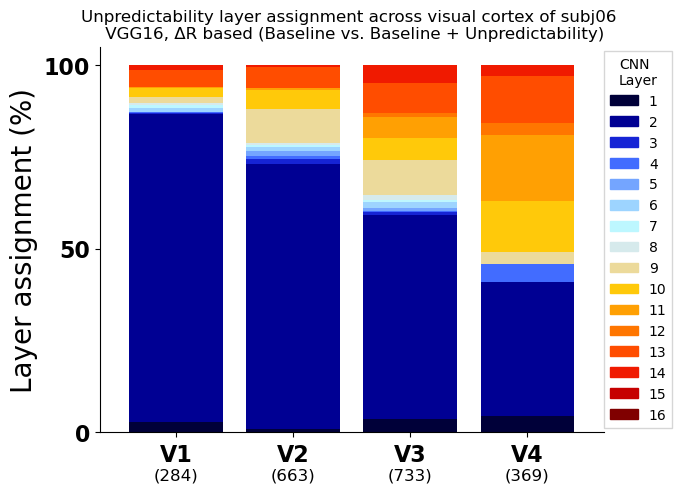

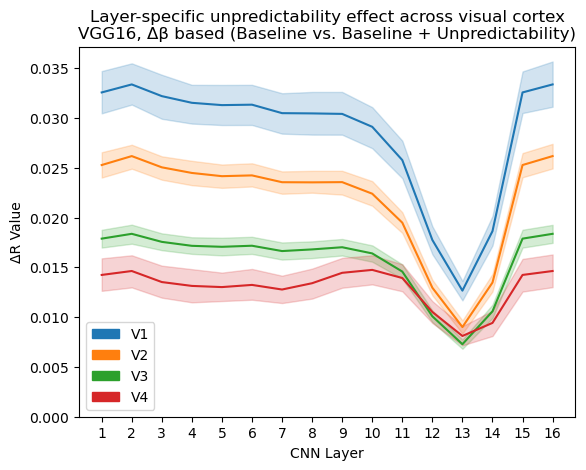

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


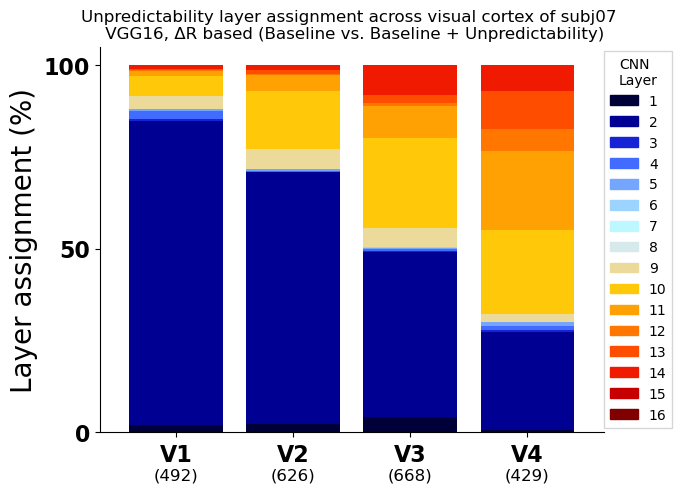

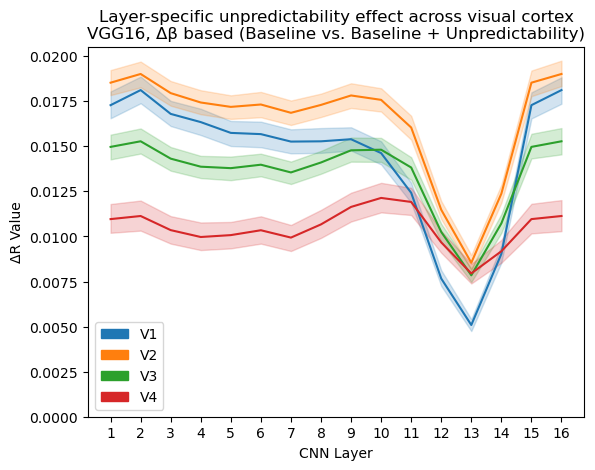

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


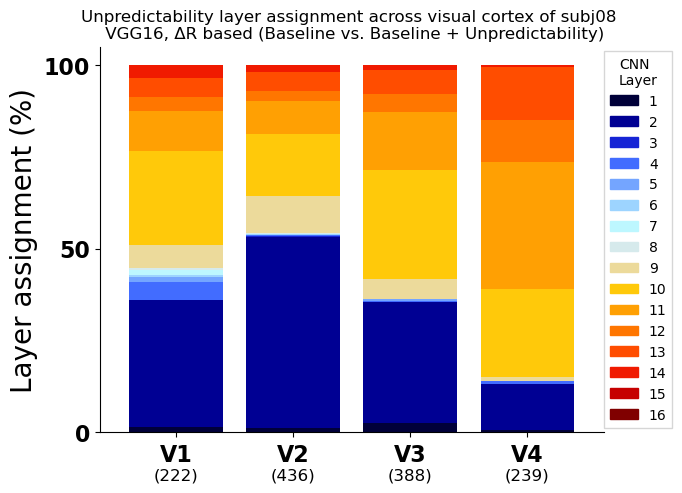

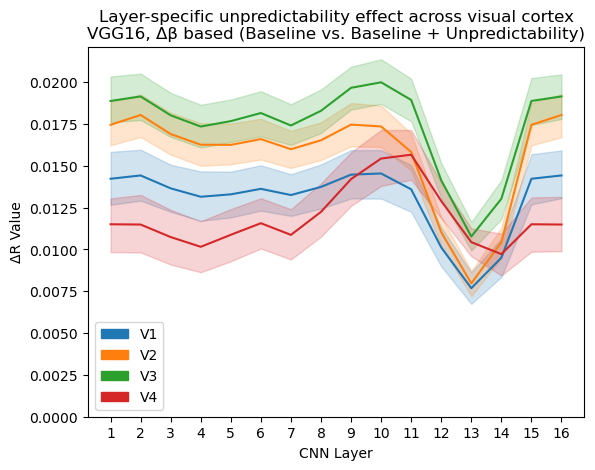

In [4]:
for subject in NSP.subjects:

    vgg16results = rd(subject=subject, folder=f"unpred/vggfull_gabor_baseline_optim", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True) # Norm layer is not in the encoding featmaps (i think)
    vgg16results.df
    vgg16results.assign_layers(max_or_weighted="max",
                            verbose=True,
                            title=f"Unpredictability layer assignment across visual cortex of {subject} \n VGG16, ΔR based (Baseline vs. Baseline + Unpredictability)",
                            #   figsize = (6 , 5.5))
                            figsize = (6.5 , 5))
    
    vgg16results.mean_lines(fit_polynom = False,
                polynom_order = 4,
                verbose = True,
                plot_catplot = False,
                title = "Layer-specific unpredictability effect across visual cortex\nVGG16, Δβ based (Baseline vs. Baseline + Unpredictability)")


### Gabor baseline peripheral patches unpredictability results

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


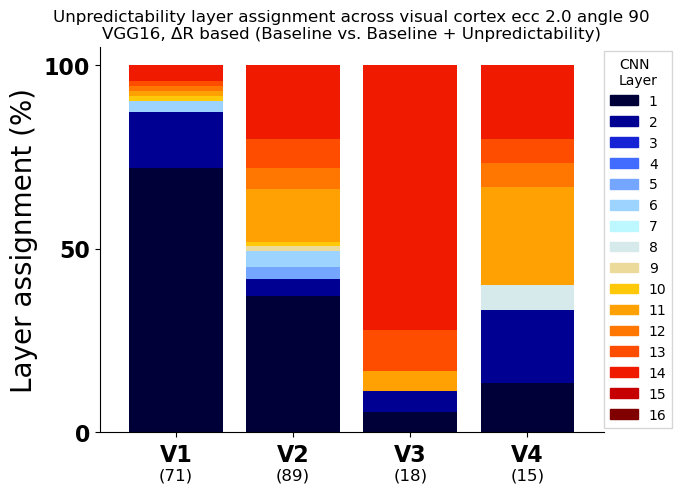

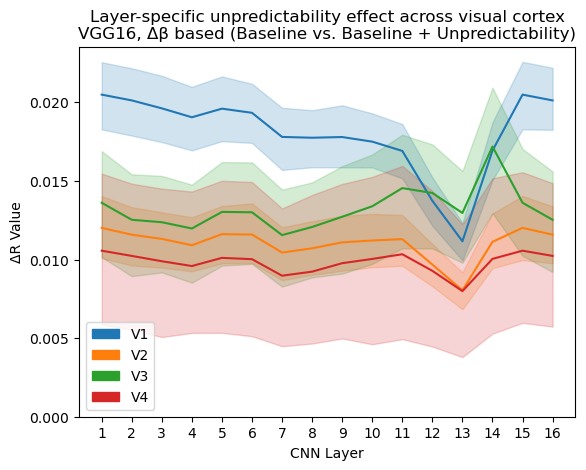

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


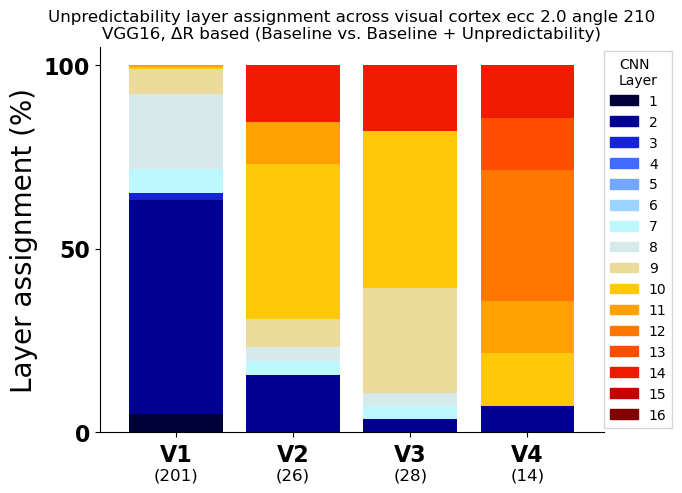

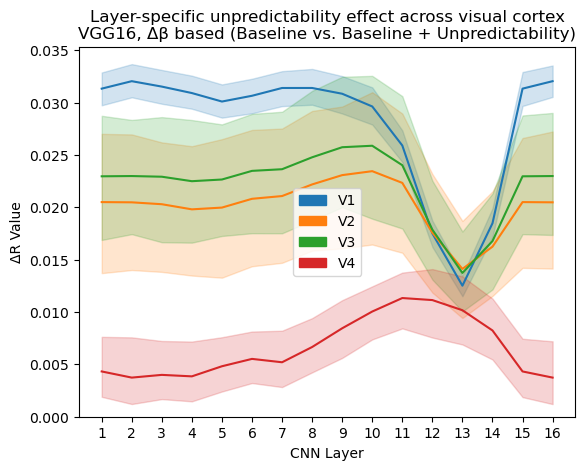

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


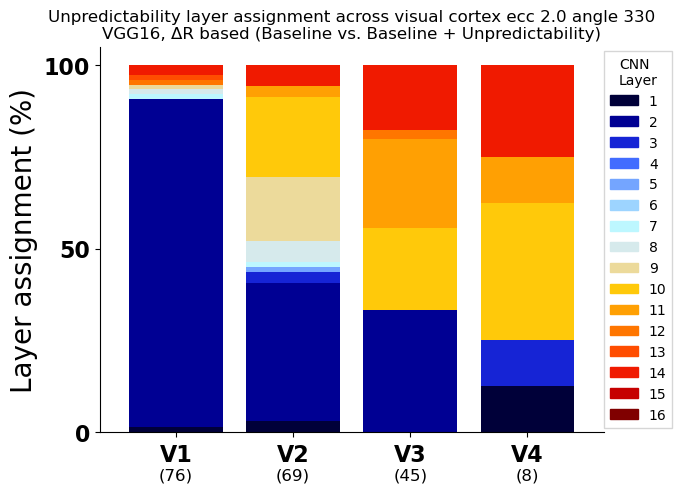

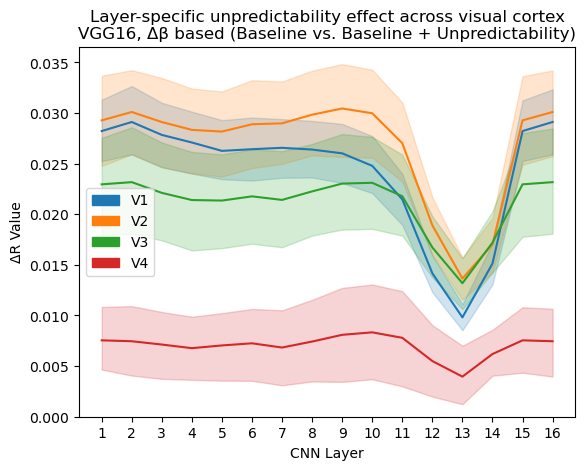

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


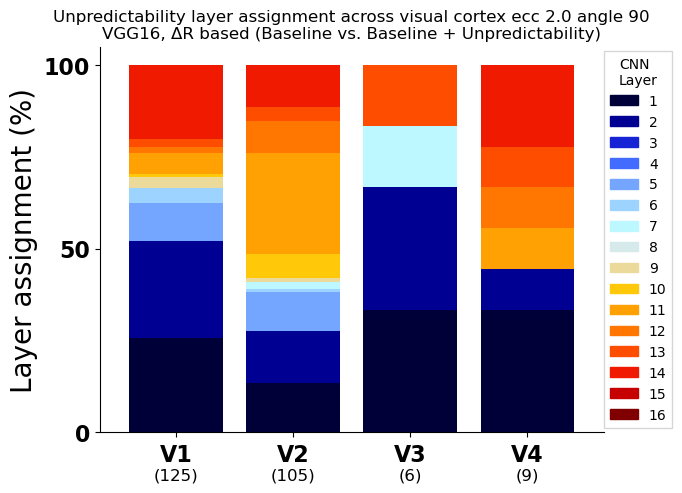

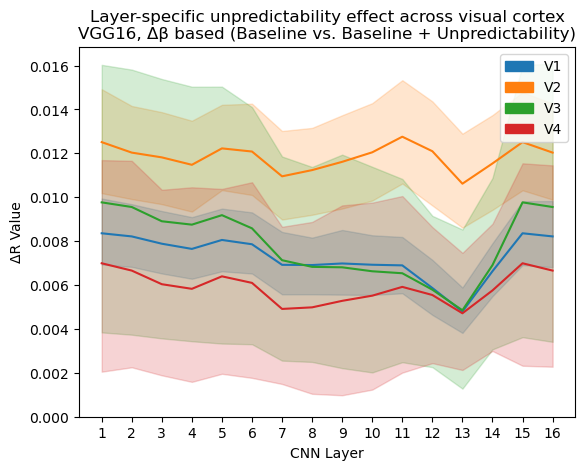

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


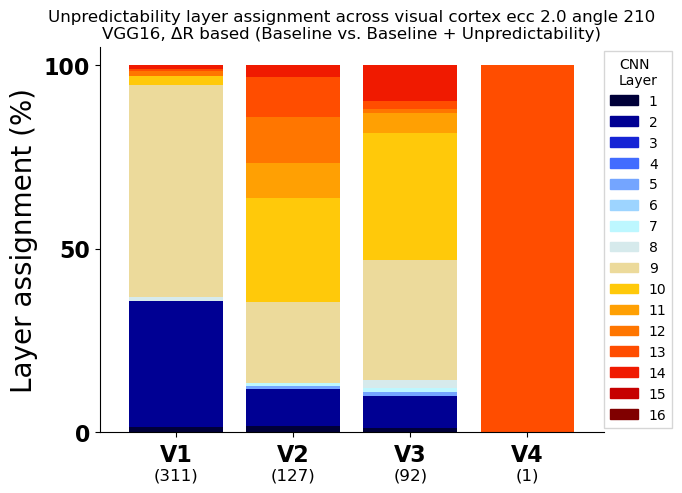

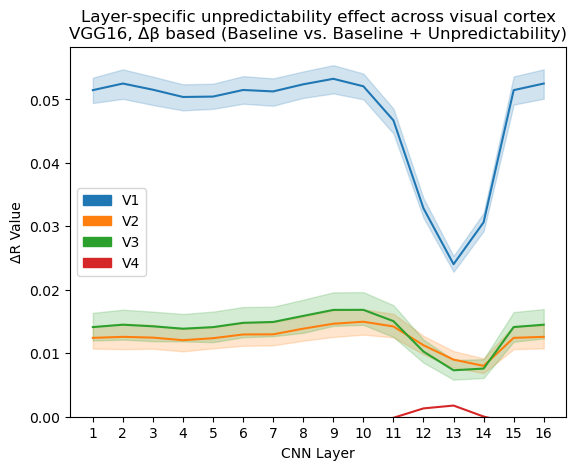

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


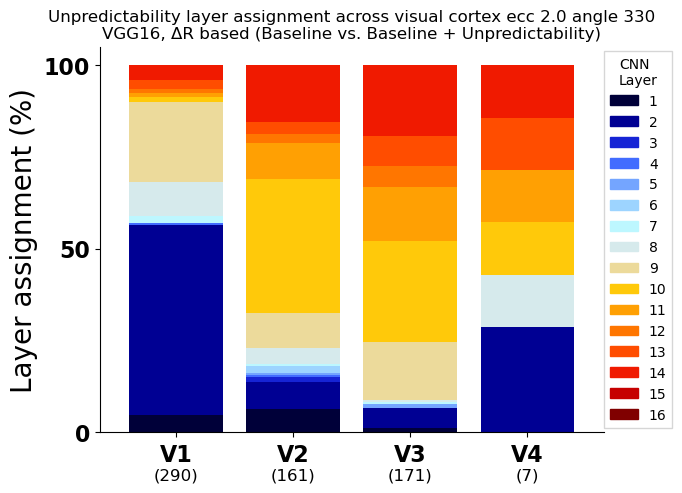

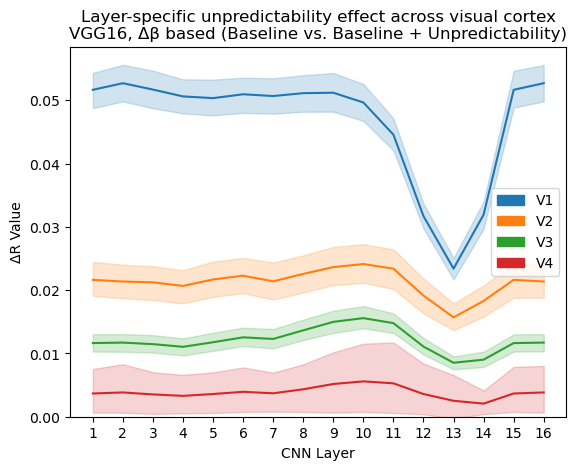

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


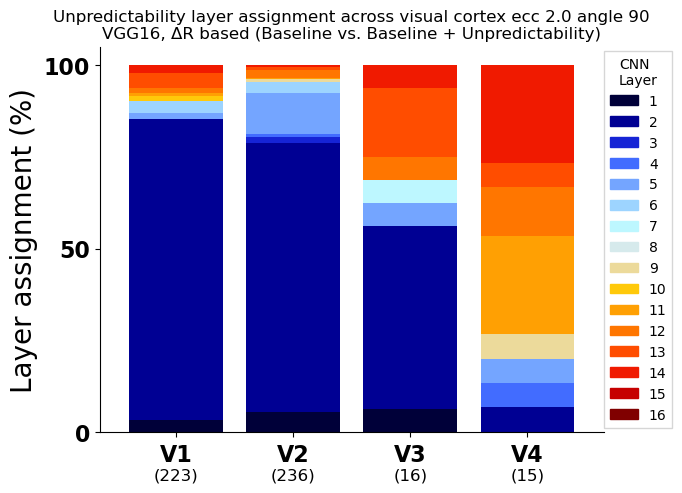

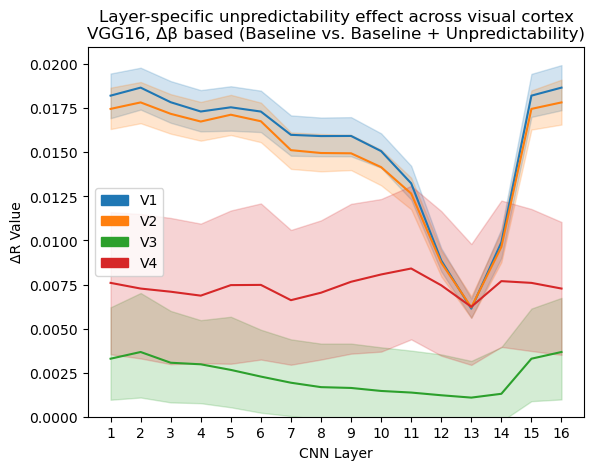

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


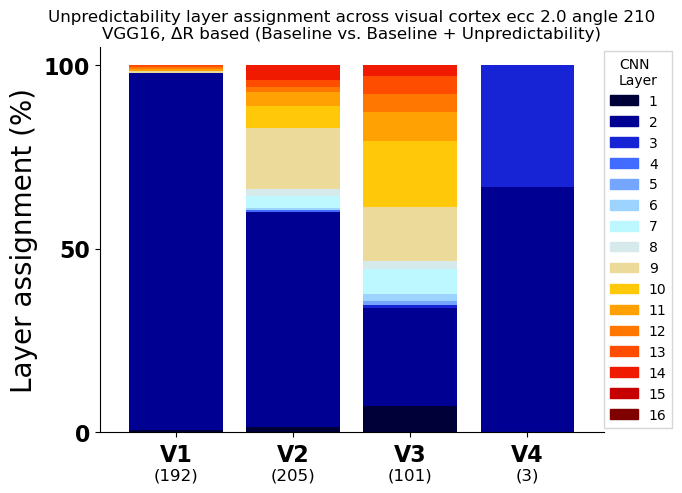

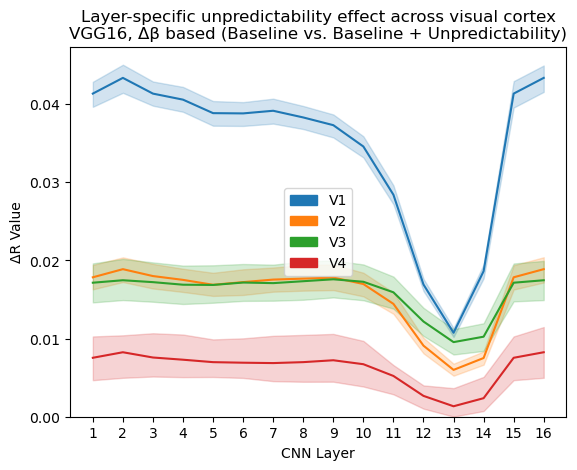

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


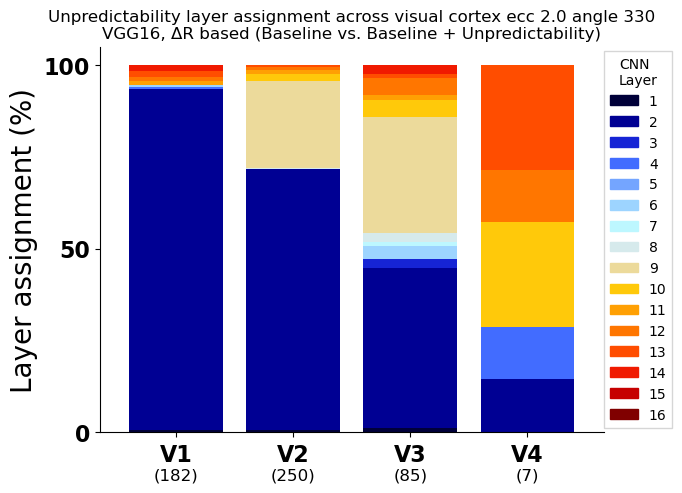

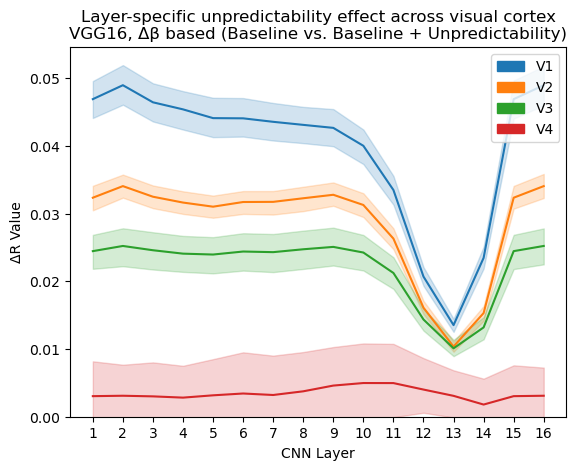

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


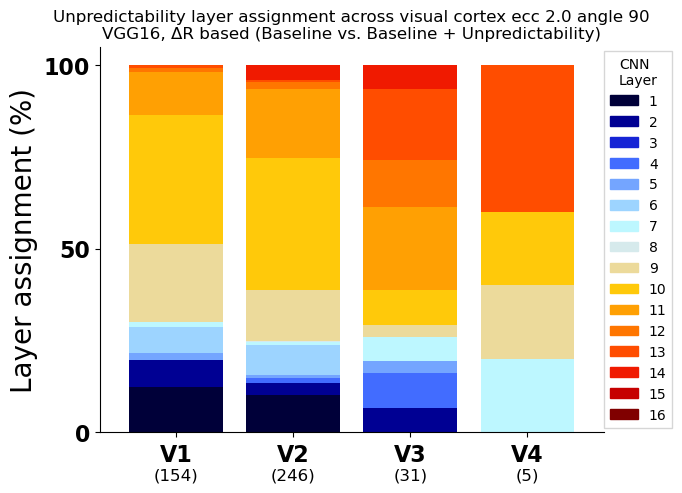

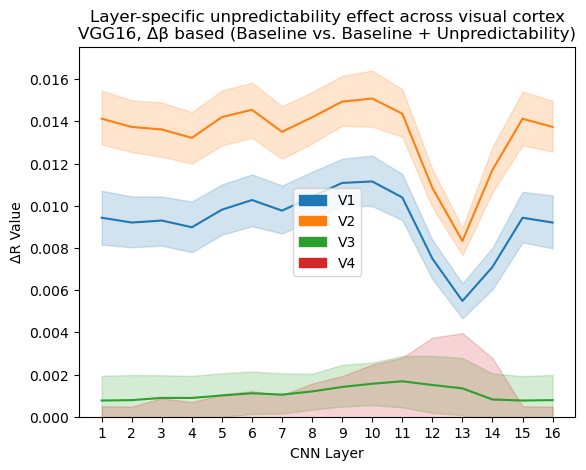

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


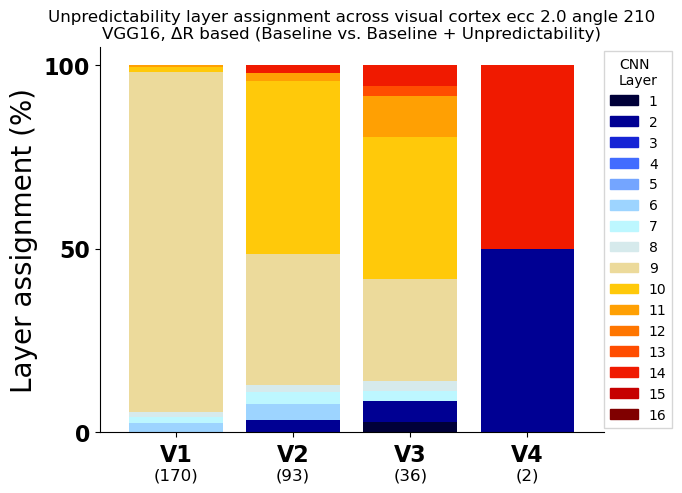

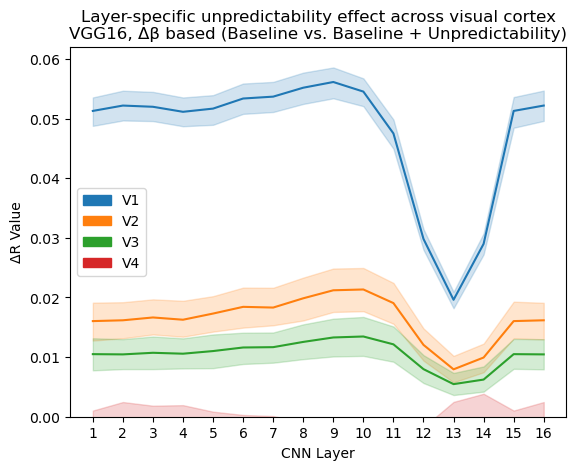

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


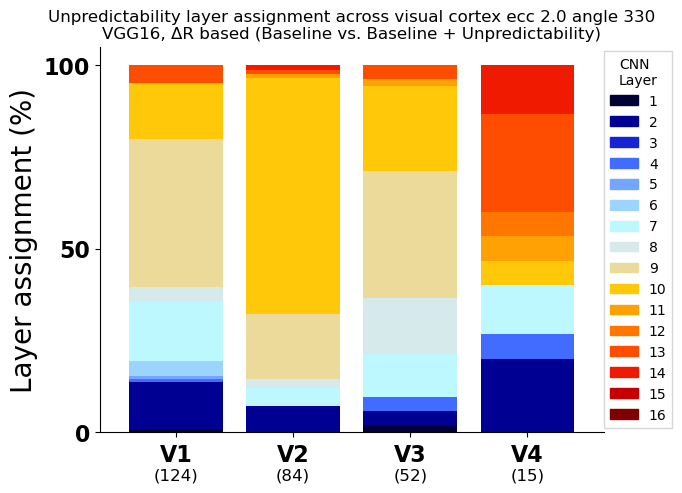

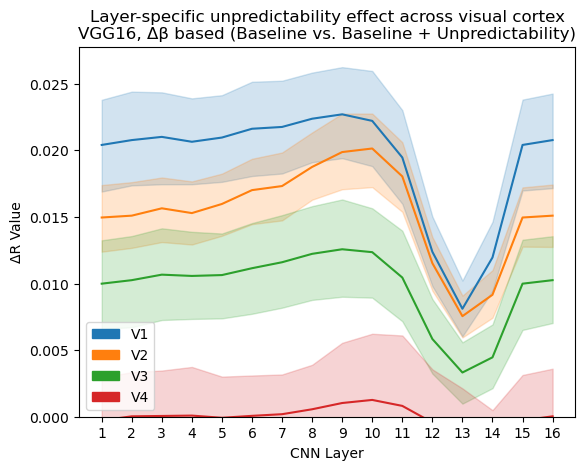

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


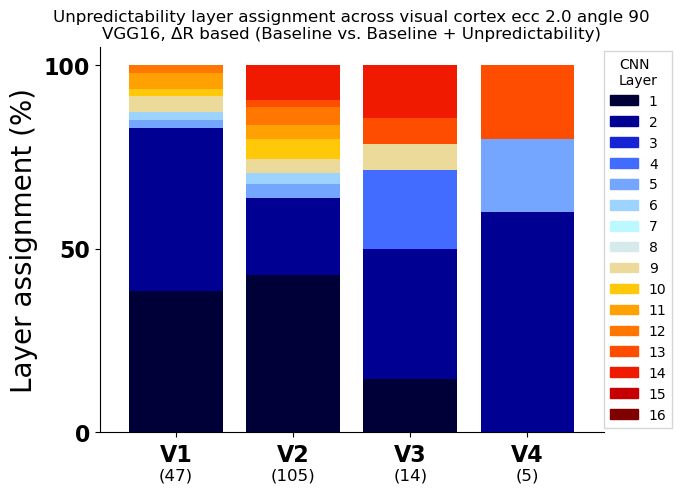

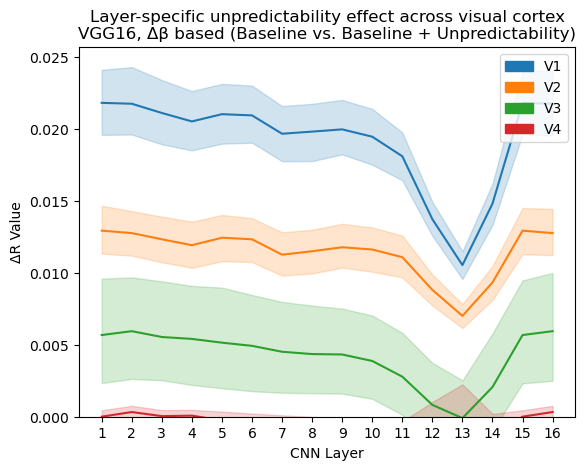

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


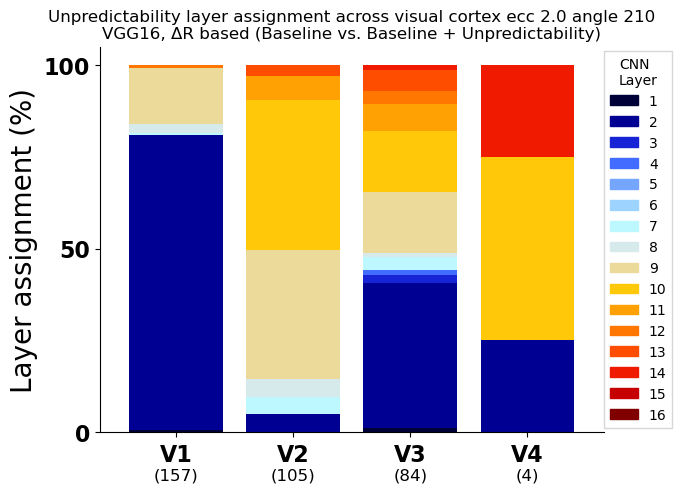

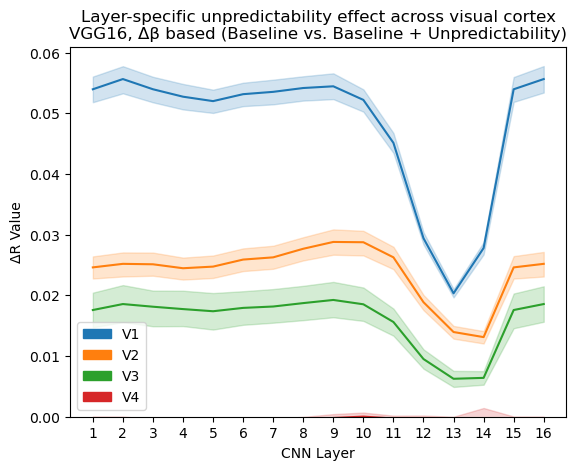

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


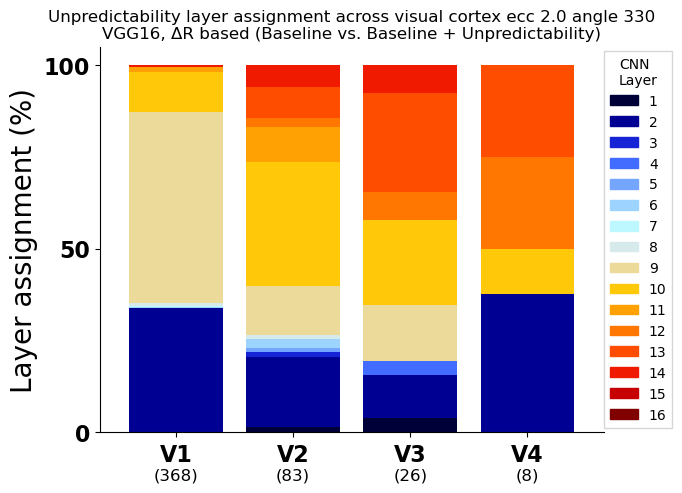

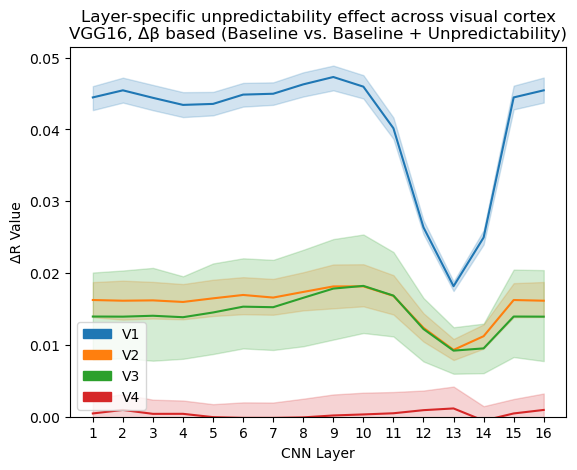

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


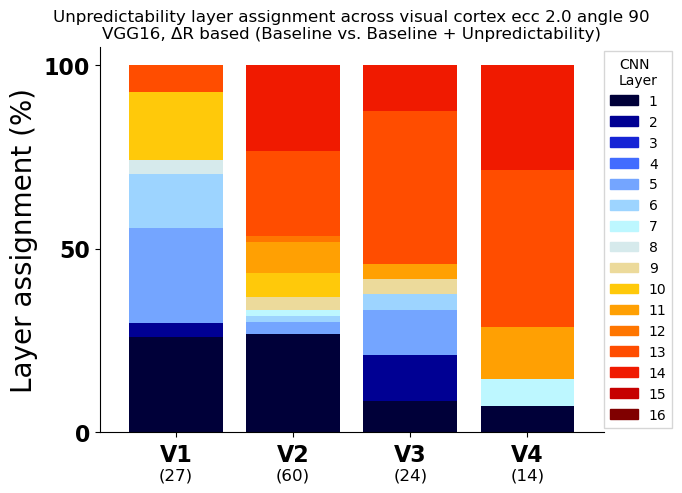

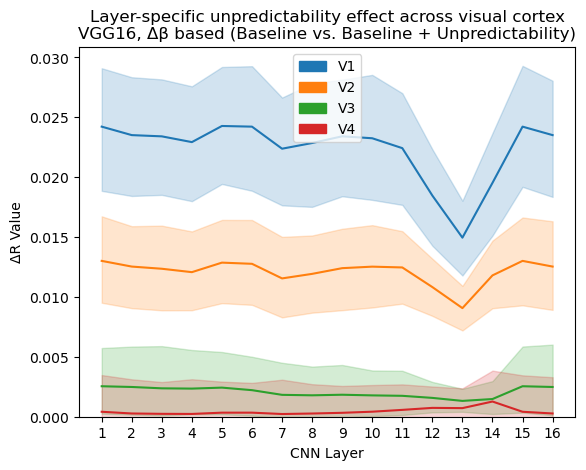

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


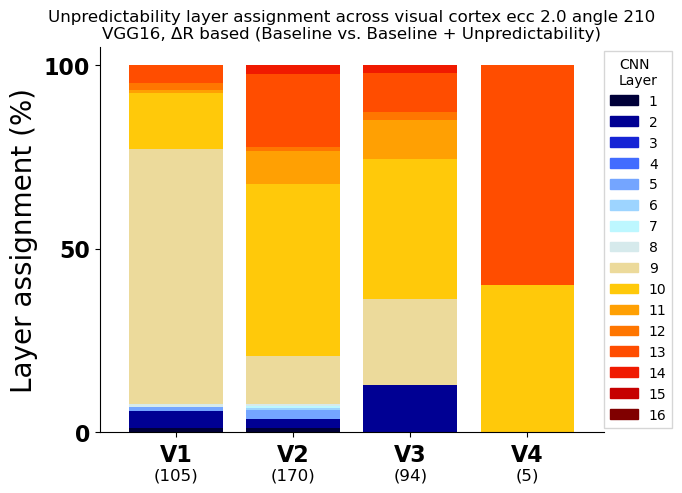

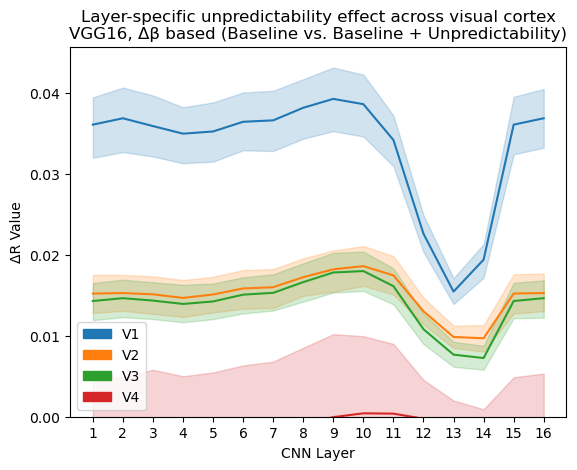

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


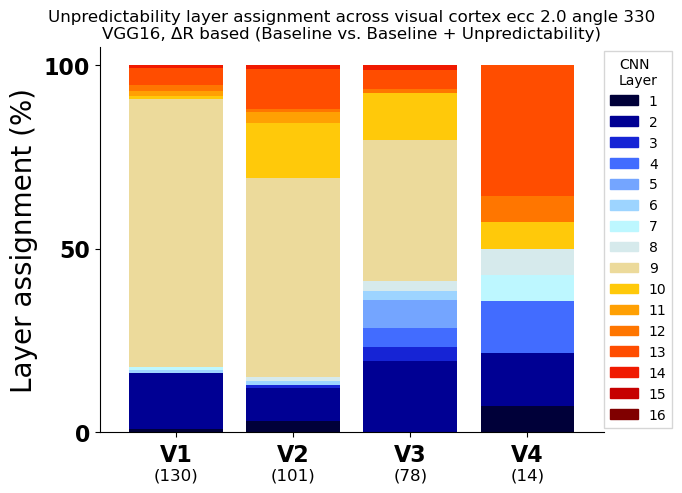

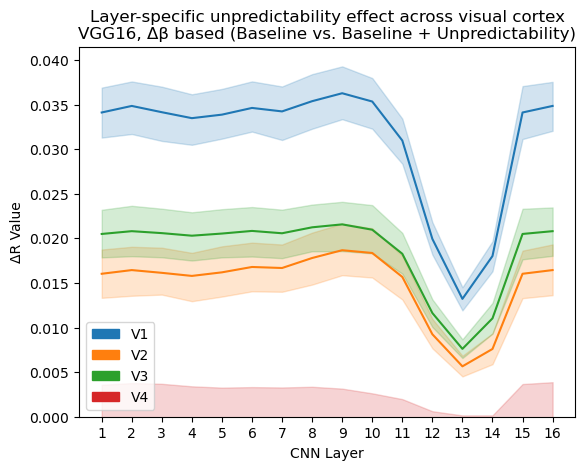

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


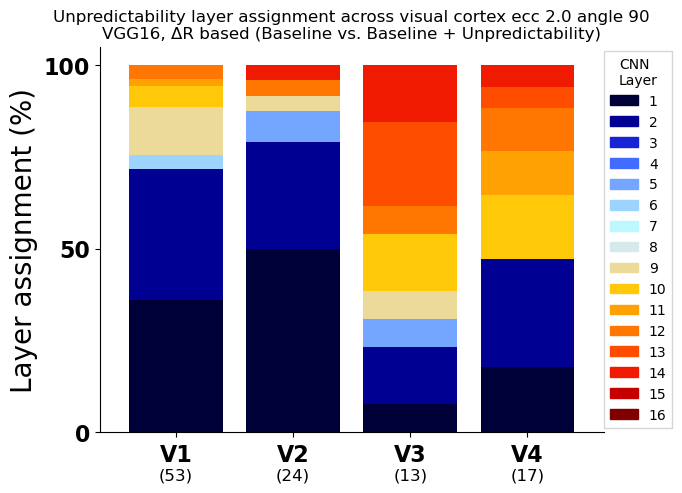

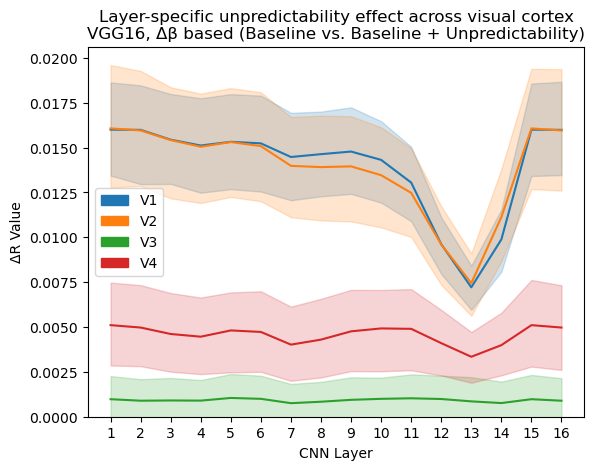

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


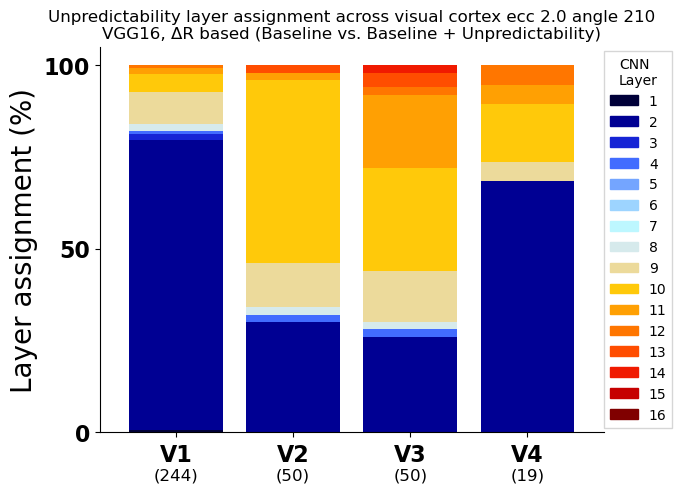

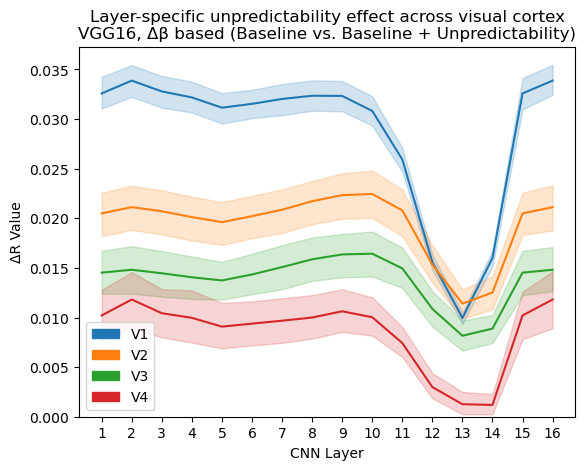

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


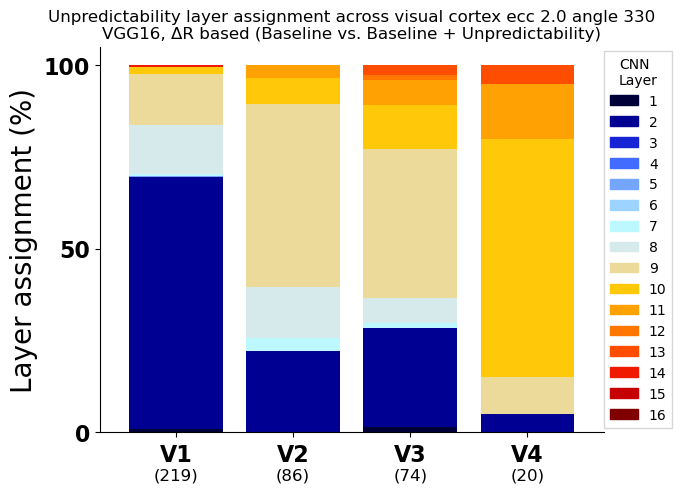

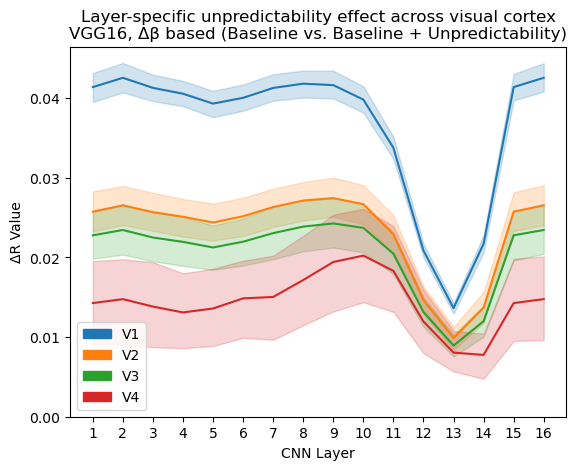

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


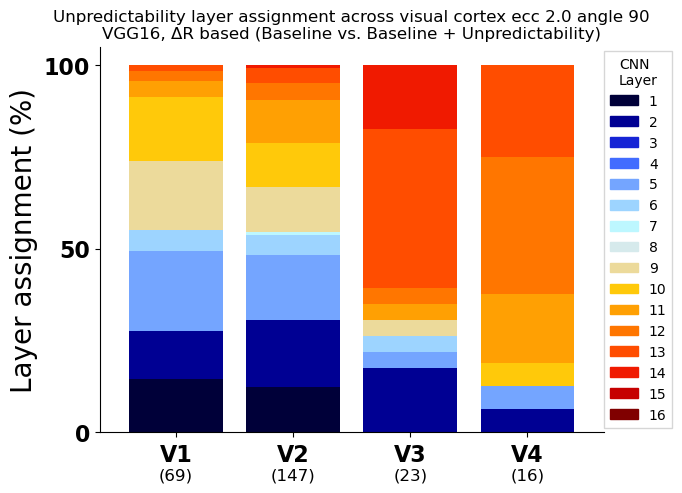

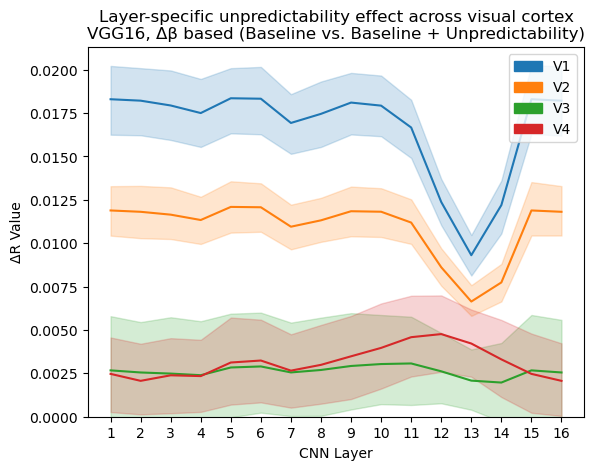

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


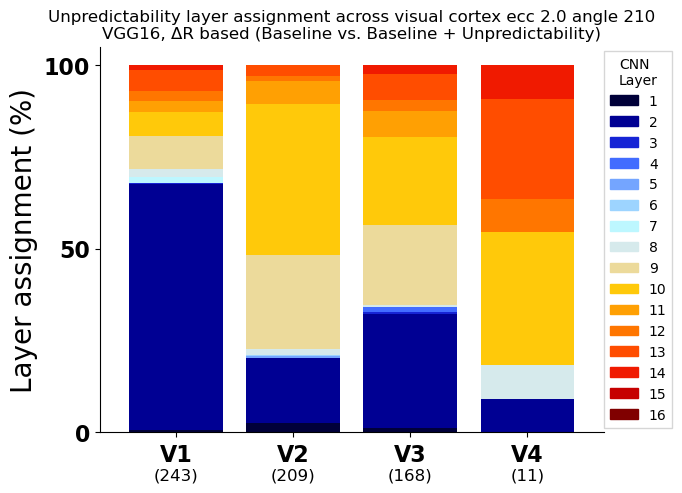

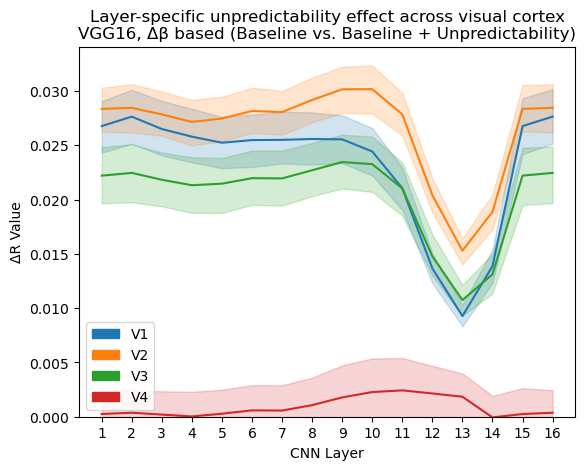

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.
Number of layers: 16


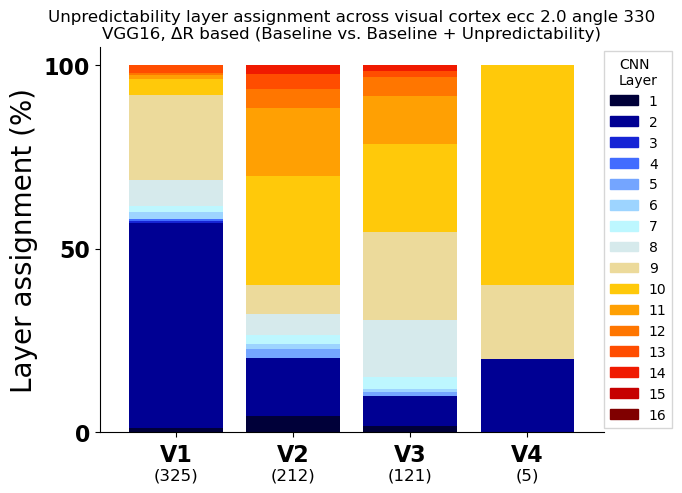

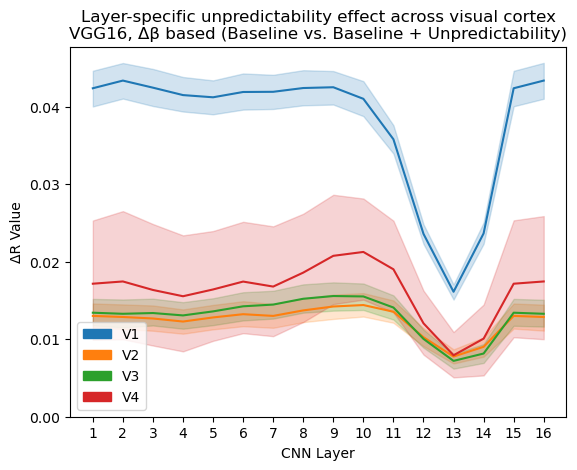

In [5]:
for subject in NSP.subjects:
    for angle in [90, 210, 330]:
        vgg16results = rd(subject=subject, folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor_optim", model="vggfull", statistic="delta_r", verbose=False, skip_norm_lay = True) # Norm layer is not in the encoding featmaps (i think)
        vgg16results.df
        vgg16results.assign_layers(max_or_weighted="max",
                                verbose=True,
                                title=f"Unpredictability layer assignment across visual cortex ecc 2.0 angle {angle}\nVGG16, ΔR based (Baseline vs. Baseline + Unpredictability)",
                                #   figsize = (6 , 5.5))
                                figsize = (6.5 , 5))
        
        vgg16results.mean_lines(fit_polynom = False,
                    polynom_order = 4,
                    verbose = True,
                    plot_catplot = False,
                    title = "Layer-specific unpredictability effect across visual cortex\nVGG16, Δβ based (Baseline vs. Baseline + Unpredictability)")
    

In [ ]:

# fovperi_per_lay(subject="subj04", statistic="beta_unpred", angles=[90, 210, 330], alpha=1, cmap="jet")
for subject in NSP.subjects:
    # for angle in [90, 210, 330]:
    fovperi_per_lay(subject=subject, statistic="beta_unpred", angles=[90, 210, 330], alpha=.75, cmap="layassign")
# testdf = fovperi_per_lay(subject="subj01", statistic="beta_unpred", angles=[330], alpha=.75, cmap="layassign")

In [20]:
from pyparsing import line


def _get_fovea_df(subject:str, statistic:str="delta_r", aggregate_layers:bool=True):
    # Foveal results, delta r unpredictability
    fov_results = rd(
        subject=subject,
        folder=f"unpred/vggfull_gabor_baseline_optim",
        model="vggfull",
        statistic=statistic,
        verbose=False,
        skip_norm_lay=True,
    )  # Norm layer is not in the encoding featmaps (i think)

    fov_df = fov_results.df

    # Group by 'roi' and calculate the mean, excluding the first three columns
    fov_grouped = fov_df.iloc[:, 3:].groupby('roi').mean()

    if aggregate_layers:
        # Calculate the mean over all columns
        fov_mean = fov_grouped.mean(axis=1)
        return fov_mean
    else:
        # Add a prefix to column names
        fov_grouped = fov_grouped.add_prefix('Fovea_')
        # Add a new column 'a' with value 'Fovea'
        fov_grouped['a'] = 'Fovea'
    
        return fov_grouped


def _get_peri_df(subject:str, statistic:str, angles:list=[90, 210, 330], aggregate_layers:bool=True):
    
    # Peripheral results, delta r unpredictability
    for angle_no, angle in enumerate(angles):

        results = rd(
            subject=subject,
            folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor_optim",
            model="vggfull",
            statistic=statistic,
            verbose=False,
            skip_norm_lay=True,
        )  # Norm layer is not in the encoding featmaps (i think)
        if angle_no == 0:
            peri_df = results.df
        else:
            peri_df = pd.concat([peri_df, results.df])

    # Group by 'roi' and calculate the mean, excluding the first three columns
    peri_grouped = peri_df.iloc[:, 3:].groupby('roi').mean()

    if aggregate_layers:
        # Calculate the mean over all columns
        peri_mean = peri_grouped.mean(axis=1)
        return peri_mean
    else: 
        # Add a prefix to column names
        peri_grouped = peri_grouped.add_prefix('Peri_')
    
        # Add a new column 'a' with value 'Para-foveal'
        peri_grouped['a'] = 'Para-foveal'
        return peri_grouped

def fovperi_plot(subjects, statistic:str="delta_r", angles:list=[90, 210, 330], aggregate_layers:bool=True, ylabel:str=None):
    """Quick lazy function to plot individual subject mean values of foveal and parafoveal unpredictability 

    Args:
        subjects (str or list): The subject(s)
    """    
    # If subjects is a string, make it a list
    if isinstance(subjects, str):
        subjects = [subjects]

    # Calculate the number of rows and columns for the subplots
    num_plots = len(subjects)
    num_rows = int(math.sqrt(num_plots))
    num_cols = num_plots // num_rows
    num_cols += num_plots % num_rows

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

    # Set a title for the entire figure
    fig.suptitle(f"Unpredictability sensitivity effects for foveal vs. para-foveal natural image patches (para-foveal patches at angles: {angles})", fontsize=16)

    # If there's only one subplot, axs is not a list
    if num_plots == 1:
        axs = [axs]

    # If axs is a numpy array, ravel it
    if isinstance(axs, np.ndarray):
        axs = axs.ravel()

    for ax, subject in zip(axs, subjects):
        fov_data = _get_fovea_df(subject, statistic, aggregate_layers)
        peri_data = _get_peri_df(subject, statistic, angles, aggregate_layers)

        if aggregate_layers:
            peri_fov_df = pd.concat([fov_data, peri_data], axis=1)
            peri_fov_df.columns = ['Fovea', 'Para-foveal']
        else:
            # Stack the dataframes vertically
            fov_data['Location'] = 'Fovea'
            peri_data['Location'] = 'Para-foveal'
            peri_fov_df = pd.concat([fov_data, peri_data], axis=0)

        peri_fov_df = peri_fov_df.reset_index()

        _plot_df(peri_fov_df, ax, subject, aggregate_layers, ylabel)

    # Remove unused subplots
    for ax in axs[num_plots:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

def _plot_df(peri_fov_df, ax, subject, aggregate_layers, ylabel:str=None):
    # Create a color map based on the unique values in the 'roi' column
    colors = plt.cm.hot(np.linspace(0, 1, len(peri_fov_df['roi'].unique())+2))


    # Melt the dataframe to long format for easier plotting with seaborn
    if aggregate_layers:
        long_df = peri_fov_df.melt(id_vars='roi', value_vars=['Fovea', 'Para-foveal'], var_name='a', value_name='Δr values')
    else:
        # Melt the dataframe including the new column names
        long_df = peri_fov_df.melt(id_vars=['roi', 'Location'], value_vars=[col for col in peri_fov_df.columns if col not in ['roi', 'Location']], var_name='Layer', value_name='Δr values')

    # Create a color palette with a different color for each unique 'roi' value
    palette = dict(zip(peri_fov_df['roi'].unique(), colors))

    # Create the line plot without a legend
    sns.lineplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, legend=False, ax=ax, linewidth=3)

    # Add the scatter plot
    sns.scatterplot(x='a', y='Δr values', hue='roi', data=long_df, palette=palette, ax=ax, s=100)

    # Change the x-axis title
    ax.set_xlabel('Visual field location')
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    # ax.set_ylabel('β coefficient')

    ax.set_title(f"Subject {subject[-1]}")
    ax.set_ylim(bottom=0)

    # Get the current legend
    legend = ax.legend()

    # Change the legend title
    legend.set_title("ROI")

In [ ]:
fovperi_plot(NSP.subjects, "R_alt_model", angles=[90, 210, 330], ylabel="Δr baseline")
fovperi_plot(NSP.subjects, "beta_unpred", angles=[90, 210, 330], ylabel="β")
fovperi_plot(NSP.subjects, "delta_r", angles=[90, 210, 330], ylabel="Δr")
